# One Hot Encoding (OHE) 🔥

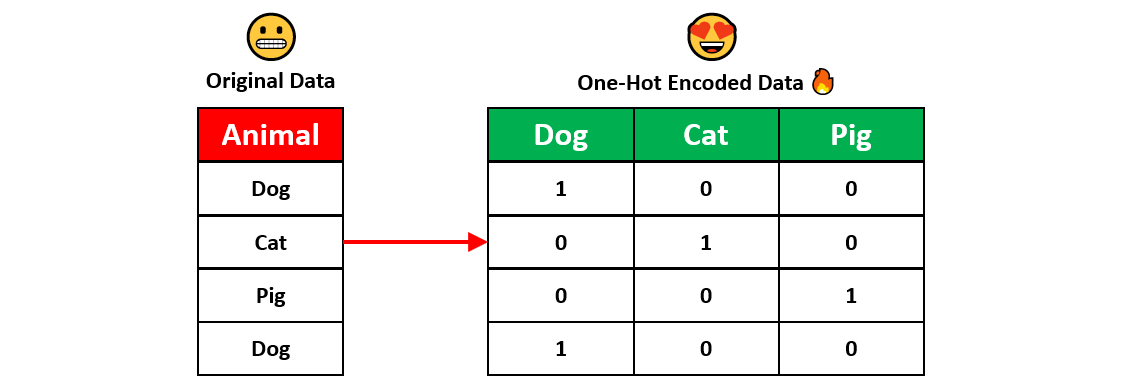

## Table of Contents:

* [Introduction](#1)
    * [Why not .get_dummies( ) ?](#1.1)
* [Importing Data](#2)
    * [Dimensions](#2.1)
    * [Number of Categorical Variables](#2.2)
    * [Filter Categorical Variables](#2.3)
    * [Predicted Number of Additional Columns](#2.4)
* [One Hot Encoding (OHE)](#3)
    * [Actual Number of Additional Columns](#3.1)

## Introduction 🔥 <a class="anchor" id="1"></a>

Machines love numbers 🔢💘 NOT so fond of text 📝💩

A lot of data comes in the form of text data, so data scientists need to be able to convert these features from a text data type to a numerical data type, so your machine learning algorithms don't blow up 💥

In this tutorial, we will learn how to One Hot Encode (OHE) categorical variables in a data set. 

We will take a data set on housing sales data, and we will encode all of the categorical features of this data frame to create dummy variables which will then be added back to the original data frame. In turn, we will also need to drop the original columns that were encoded, as our machine learning algorithms do not like these.

### Why not .get_dummies( ) ?🔥 <a class="anchor" id="1.1"></a>

An alternative approach to encoding categorical variables is to use the **.get_dummies( )** method. Given that we will be creating dummy variables either way, why not use this method, instead? The answer is because .get_dummies( ) is much less efficient than using OHE for larger data sets 🐌 OHE is more efficient as it leverages something called a **sparse matrix** rather than just outputting the entire data frame.

## Importing Data🔥 <a class="anchor" id="2"></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Import data
data = pd.read_csv('Ames_Housing_Sales.csv')

# Display subset of data frame
data.iloc[:,:10].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0


### Dimensions 🔥 <a class="anchor" id="2.1"></a>

We can see the dimension of the data frame using **.shape**, and we find that our data frame has 1379 rows and 80 columns.

In [2]:
data.shape

(1379, 80)

### Number of Categorical Variables 🔥 <a class="anchor" id="2.2"></a>

Using the **.value_counts( )** method, we can count the number of each type of variable in our data frame 🧮 We see that we have $43$ columns of data type *object* (string variables).

In [3]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

### Filter Categorical Variables 🔥 <a class="anchor" id="2.3"></a>

We will now create a variable, **mask**, that will enable us to filter out non-categorical variables from our data frame. **mask** will take a *boolean* value for each feature depending on whether the feature is a categorical variable or not.

In [4]:
# Create mask variable
mask = data.dtypes == np.object

# Display mask
mask

1stFlrSF        False
2ndFlrSF        False
3SsnPorch       False
Alley            True
BedroomAbvGr    False
                ...  
WoodDeckSF      False
YearBuilt       False
YearRemodAdd    False
YrSold          False
SalePrice       False
Length: 80, dtype: bool

Now, we select only features where **mask** $== \text{True}$.

In [5]:
# Select only categorical variables
categorical_cols = data.columns[mask]

### Predicted Number of Additional Columns 🔥 <a class="anchor" id="2.4"></a>

One Hot Encoding can drastically increase the number of features in our data frame 📈 This runs the risk of creating features that are **highly correlated** with one another. Therefore, it is sensible to determine how many additional features ($n$) would be created after the OHE process.

Recall, however, that the number of OHE-features in our final data frame will be $n-1$, where $n$ is the total number of feature labels. Suppose, for example, that we had one categorical feature called **animal** that labelled observations as either a dog 🐶 cat 🐱 or pig 🐷 then the number of labels is $n = 3$. We would end up with $n-1=2$ additional features (dummy variables) after encoding. 

This is done because we wish to drop one of the levels of each categorical variable that we encode to avoid the **Dummy Variable Trap** that is a result of **perfect multicollinearity** 🚩 In short, this is a situation where the value taken in one column is exactly determined by the value taken in one or more other columns.

To determine how many extra columns would be created initially, we use a **lambda** function. For each feature in our categorical variable data frame, the lambda function will return the number of unique values for that feature.

In [6]:
# Determine how many extra columns would be created
num_ohe_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))

# Display data frame
num_ohe_cols.head(10)

Neighborhood    25
Exterior2nd     16
Exterior1st     14
Condition1       9
SaleType         9
RoofMatl         8
HouseStyle       8
Condition2       8
Functional       7
BsmtFinType2     7
dtype: int64

So, for example, the feature **Neighborhood** has 25 unique values, whereas **SaleType** has 9.

We will not be interested in encoding features with only one value, so will remove these from the data frame ❌ On this occasion there are no features with only one value, but it is a useful step to have.

In [7]:
# No need to encode if there is only one value
small_num_ohe_cols = num_ohe_cols.loc[num_ohe_cols>1]

Now, we wish to reduce each value count by one (as there will be $n-1$ new features after encoding, and finally, we want to sum the values for each feature to discern how many additional features will be created.

In [8]:
# Subtract 1 value from each feature
small_num_ohe_cols -= 1

# Sum of new features
small_num_ohe_cols.sum()

215

This returns a value of $215$ meaning that $215$ additional features would be created by the encoding process.

## One Hot Encoding (OHE) 🔥 <a class="anchor" id="3"></a>

After importing **OneHotEncoder**, we will make a copy of our data frame to calculate the difference in columns before and after encoding.

Note that a OneHotEncoder can also be initialised using the argument **drop='first'**. This will drop the first value from the categorical features.

In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohe = data.copy()

# The encoders
ohe = OneHotEncoder()

We are going to create a **for loop** 🔁 This loop will:

1. Loop through each categorical feature
2. One hot encode the data to return a sparse arra
3. Remove the original feature variable from the data frame
4. Get names of all unique values in column so we can identify later
5. Create column names for each OHE column by value
6. Create new data frame
7. Append new data frame to data frame

In [10]:
# (1) - Loop through categorical variables
for col in num_ohe_cols.index:
    
    # (2) - OHE data
    new_dat = ohe.fit_transform(data_ohe[[col]])
    
    # (3) - Remove original column
    data_ohe = data_ohe.drop(col, axis=1)
    
     # (4) - Get unique value names
    cats = ohe.categories_
    
    # (5) - Create column names
    new_cols = ['_'.join([col,cat]) for cat in cats[0]]
    
    # (6) - Create new df
    new_df = pd.DataFrame(new_dat.toarray(),columns=new_cols)
    
    # (7) - Append df
    data_ohe = pd.concat([data_ohe, new_df], axis =1)

We now wish ascertain how many additional columns were created by encoding. We achieve this using **.shape[1]** which will return the number of columns of both data frames, and subtracting the number of columns in our original data frame from the number of columns in our encoded data frame.

### Actual Number of Additional Columns 🔥 <a class="anchor" id="3.1"></a>

In [11]:
# Column difference is as calculated above
data_ohe.shape[1] - data.shape[1]

215

We have $215$ new columns, which is great! It aligns with our prior calculation 💪🤓